<a href="https://colab.research.google.com/github/nashtyuk/predictiveanalystics/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

[Data Source](https://data.world/datafiniti/wine-beer-and-liquor-reviews)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob

In [2]:
path = '/content/wine reviews.csv'
df = pd.read_csv(path , engine='python')

In [3]:
df

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,I was given this wine so it was a delightful s...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,AV654xcDYSSHbkXwoTj_,NaN,Vintage Wine Estates,"Wine Shop,Kitchen and Food,View All Food",2017-09-25T16:31:30Z,2018-01-03T18:57:51Z,"[{""dateSeen"":[""2017-12-10T09:34:00.000Z"",""2017...",NaN,NaN,NaN,...,http://qvc.ugc.bazaarvoice.com/1689wcs-en_us/M...,I only like a sweet wine. I was skeptical on o...,Excellent,NaN,NaN,Cablegal,NaN,http://www.qvc.com/Vintage-Wine-Estates-Kevin-...,NaN,NaN
2886,AV654xcDYSSHbkXwoTj_,NaN,Vintage Wine Estates,"Wine Shop,Kitchen and Food,View All Food",2017-09-25T16:31:30Z,2018-01-03T18:57:51Z,"[{""dateSeen"":[""2017-12-10T09:34:00.000Z"",""2017...",NaN,NaN,NaN,...,http://qvc.ugc.bazaarvoice.com/1689wcs-en_us/M...,I ordered a 3 bottle set of both the Meritage ...,Delicious !!,NaN,NaN,Rosie6583,NaN,http://www.qvc.com/Vintage-Wine-Estates-Kevin-...,NaN,NaN
2887,AV654xcDYSSHbkXwoTj_,NaN,Vintage Wine Estates,"Wine Shop,Kitchen and Food,View All Food",2017-09-25T16:31:30Z,2018-01-03T18:57:51Z,"[{""dateSeen"":[""2017-12-10T09:34:00.000Z"",""2017...",NaN,NaN,NaN,...,http://qvc.ugc.bazaarvoice.com/1689wcs-en_us/M...,I ordered the White Zinfadel in the 3 bottle s...,Sumptuous delicious wine.,NaN,NaN,Alexandrite,NaN,http://www.qvc.com/Vintage-Wine-Estates-Kevin-...,NaN,NaN
2888,AV654xcDYSSHbkXwoTj_,NaN,Vintage Wine Estates,"Wine Shop,Kitchen and Food,View All Food",2017-09-25T16:31:30Z,2018-01-03T18:57:51Z,"[{""dateSeen"":[""2017-12-10T09:34:00.000Z"",""2017...",NaN,NaN,NaN,...,http://qvc.ugc.bazaarvoice.com/1689wcs-en_us/M...,This was my first purchase of these wines. Tri...,Excellent Moscato,NaN,NaN,teddybear2,NaN,http://www.qvc.com/Vintage-Wine-Estates-Kevin-...,NaN,NaN


In [4]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'dateAdded', 'dateUpdated',
       'descriptions', 'dimension', 'ean', 'flavors', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend',
       'reviews.id', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'sourceURLs', 'upc', 'weight'],
      dtype='object')

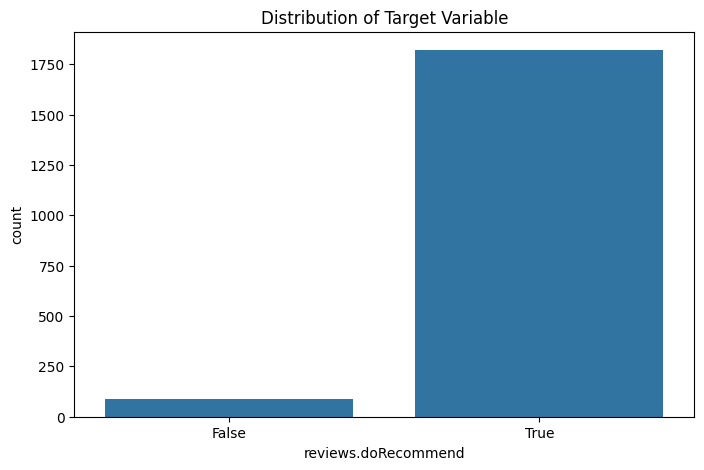

In [5]:
# Analyzing distribution of target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='reviews.doRecommend', data=df)
plt.title('Distribution of Target Variable')
plt.show()

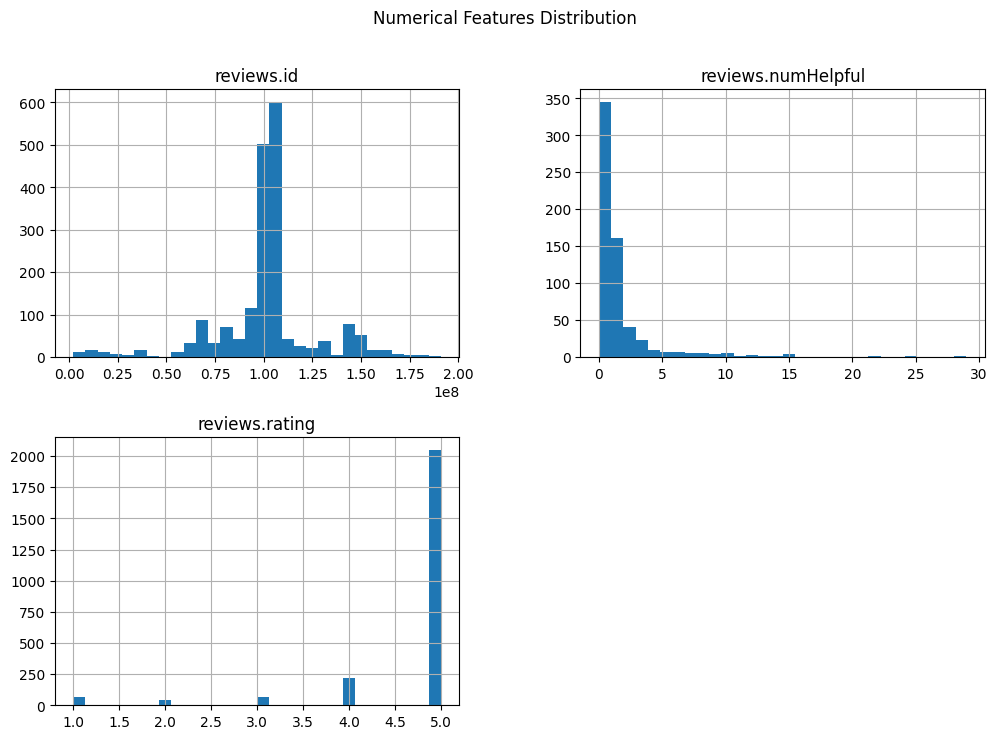

In [6]:
# Analyze numerical features distribution
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[num_features].hist(bins=30, figsize=(12, 8))
plt.suptitle('Numerical Features Distribution')
plt.show()


In [7]:
# Analyze categorical features distribution
cat_features = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_features:
    print(f"Value counts for {col}:")
    print(df[col].value_counts().head(10))
    print('-' * 40)

Value counts for id:
id
AVpf-F_EilAPnD_xlTDm    1045
AVpisFlJ1cnluZ0-Pulr     128
AVphfoRZLJeJML43blD4      65
AVpiD1J-1cnluZ0-JYg3      60
AVpgJjljLJeJML43Jpsd      57
AVpgaN2XilAPnD_xsDcQ      56
AVpi8vkj1cnluZ0-SHb4      48
AVpieRqRLJeJML43mBQ9      41
AV3j2lMuGV-KLJ3and9m      33
AV3j2lNw-jtxr-f3_SEe      31
Name: count, dtype: int64
----------------------------------------
Value counts for asins:
asins
B01CZN1JUE,B00LU1CN9E               128
B003ZS2EJE,B000WLHRNK                65
B01DFBLVYY,B01DFBLX4C                60
B00119Q3EQ,B000MVDDRY                48
B015AFXAZQ                           25
B00ARK852S,B00ANL51CI,B01I9U891E     25
B0065QEB3K                           25
B017QHLNFA                           24
B0078DRBE0                           22
B004W8FYA2                           20
Name: count, dtype: int64
----------------------------------------
Value counts for brand:
brand
Carmex                  1045
Master of Mixes          138
Jim Beam                 133
Bitte

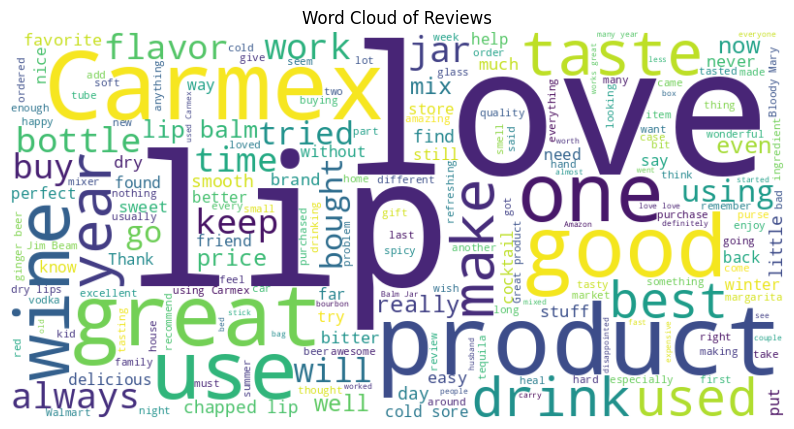

In [8]:
# Text Analysis: Build word cloud (Reviews text)
text_data = ' '.join(df['reviews.text'].dropna().astype(str))  # Replace 'review_text' with your text column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

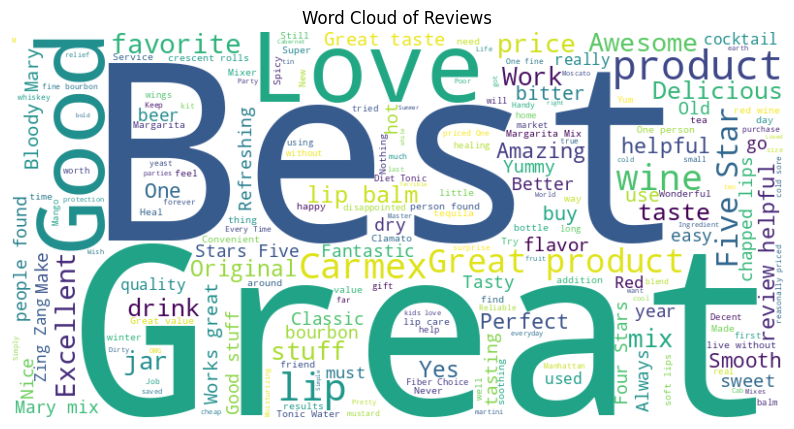

In [9]:
# Text Analysis: Build word cloud (Reviews title)
text_data = ' '.join(df['reviews.title'].dropna().astype(str))  # Replace 'review_text' with your text column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [10]:
# Word frequency analysis
words = text_data.lower().split()
word_freq = Counter(words)
most_common_words = word_freq.most_common(20)

print("Most common words and frequencies:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


Most common words and frequencies:
great: 350
the: 317
best: 214
love: 207
good: 199
a: 189
this: 185
for: 162
i: 154
to: 149
my: 131
product: 127
and: 123
it: 114
of: 98
is: 95
stars: 89
lip: 79
in: 73
you: 72


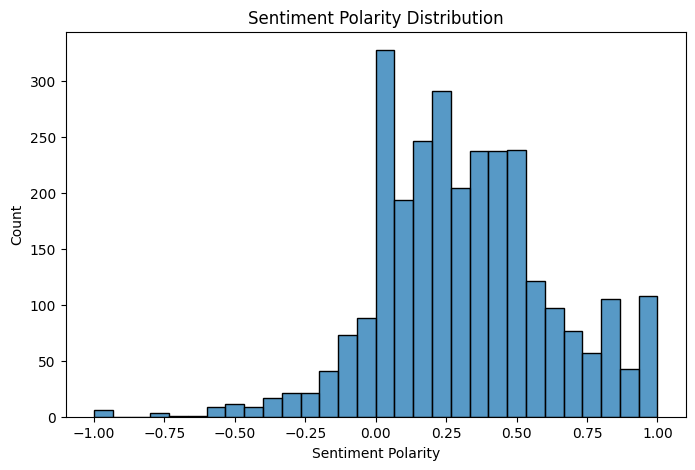

                                        reviews.text  sentiment
0      This a fantastic white wine for any occasion!   0.200000
1   Tart, not sweet...very refreshing and delicious!   0.750000
2  I was given this wine so it was a delightful s...   0.784091
3  This is a phenomenal wine and my new favorite ...   0.284091
4  4 750ml bottles for the price of two With way ...   0.219129
5  I LOVE Becks NA. It tastes just like a regular...   0.433333
6  This wine has a wonderful but strong aroma its...   0.408333
7  I would give one more star if it came clean on...   0.203571
8                      Delicious and very affordable   0.600000
9  This is a very smooth red with Aromas of cocoa...   0.185238


In [11]:
# Sentiment analysis using TextBlob
def analyze_sentiment(text):
    if pd.isna(text):
        return None
    blob = TextBlob(text)
    return blob.sentiment.polarity  # ranges from -1 (negative) to 1 (positive)

df['sentiment'] = df['reviews.text'].apply(analyze_sentiment)

plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment'].dropna(), bins=30)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.show()

print(df[['reviews.text', 'sentiment']].head(10))


#  Building and Validating a Predictive Model

In [12]:
df

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight,sentiment
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,This a fantastic white wine for any occasion!,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs,0.200000
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,"Tart, not sweet...very refreshing and delicious!",Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs,0.750000
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,I was given this wine so it was a delightful s...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs,0.784091
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs,0.284091
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs,0.219129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,AV654xcDYSSHbkXwoTj_,NaN,Vintage Wine Estates,"Wine Shop,Kitchen and Food,View All Food",2017-09-25T16:31:30Z,2018-01-03T18:57:51Z,"[{""dateSeen"":[""2017-12-10T09:34:00.000Z"",""2017...",NaN,NaN,NaN,...,I only like a sweet wine. I was skeptical on o...,Excellent,NaN,NaN,Cablegal,NaN,http://www.qvc.com/Vintage-Wine-Estates-Kevin-...,NaN,NaN,0.212946
2886,AV654xcDYSSHbkXwoTj_,NaN,Vintage Wine Estates,"Wine Shop,Kitchen and Food,View All Food",2017-09-25T16:31:30Z,2018-01-03T18:57:51Z,"[{""dateSeen"":[""2017-12-10T09:34:00.000Z"",""2017...",NaN,NaN,NaN,...,I ordered a 3 bottle set of both the Meritage ...,Delicious !!,NaN,NaN,Rosie6583,NaN,http://www.qvc.com/Vintage-Wine-Estates-Kevin-...,NaN,NaN,0.521429
2887,AV654xcDYSSHbkXwoTj_,NaN,Vintage Wine Estates,"Wine Shop,Kitchen and Food,View All Food",2017-09-25T16:31:30Z,2018-01-03T18:57:51Z,"[{""dateSeen"":[""2017-12-10T09:34:00.000Z"",""2017...",NaN,NaN,NaN,...,I ordered the White Zinfadel in the 3 bottle s...,Sumptuous delicious wine.,NaN,NaN,Alexandrite,NaN,http://www.qvc.com/Vintage-Wine-Estates-Kevin-...,NaN,NaN,0.415065
2888,AV654xcDYSSHbkXwoTj_,NaN,Vintage Wine Estates,"Wine Shop,Kitchen and Food,View All Food",2017-09-25T16:31:30Z,2018-01-03T18:57:51Z,"[{""dateSeen"":[""2017-12-10T09:34:00.000Z"",""2017...",NaN,NaN,NaN,...,This was my first purchase of these wines. Tri...,Excellent Moscato,NaN,NaN,teddybear2,NaN,http://www.qvc.com/Vintage-Wine-Estates-Kevin-...,NaN,NaN,0.400000


In [13]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'dateAdded', 'dateUpdated',
       'descriptions', 'dimension', 'ean', 'flavors', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend',
       'reviews.id', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'sourceURLs', 'upc', 'weight', 'sentiment'],
      dtype='object')

In [15]:
df['reviews.doRecommend']

,reviews.doRecommend
0,True
1,True
2,True
3,True
4,True
...,...
2885,NaN
2886,NaN
2887,NaN
2888,NaN


In [16]:
 nan_count_col_a = df['reviews.doRecommend'].isna().sum()
print(f"Number of NaNs: {nan_count_col_a}")


Number of NaNs: 979


In [17]:
df['reviews.doRecommend'] = df['reviews.doRecommend'].fillna(0).astype(int)


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
import joblib

In [22]:

# Target variable
y = df['reviews.doRecommend'].astype(int)  # binary target assuming 'doRecommend' is 0/1 or True/False

# Features split by type
text_feature = 'reviews.text'
categorical_features = ['brand', 'categories', 'flavors', 'manufacturer']
numeric_features = ['reviews.numHelpful', 'reviews.rating']

# Fill missing values
df[text_feature] = df[text_feature].fillna('')
df[categorical_features] = df[categorical_features].fillna('Unknown')
df[numeric_features] = df[numeric_features].fillna(0)

X = df[[text_feature] + categorical_features + numeric_features]

# Preprocessing pipelines
text_transformer = TfidfVectorizer(max_features=5000, stop_words='english')

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

numeric_transformer = StandardScaler()

# ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, text_feature),
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ])

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Models dictionary
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {}

for model_name, model in models.items():
    # Create pipeline: preprocessing plus model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Train
    pipeline.fit(X_train, y_train)

    # Predict
    y_pred = pipeline.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = {'pipeline': pipeline, 'accuracy': acc, 'f1_score': f1}
    print(f"{model_name} - Accuracy: {acc:.4f}, F1-score: {f1:.4f}")

# Select best model by F1-score
best_model_name = max(results, key=lambda k: results[k]['f1_score'])
best_pipeline = results[best_model_name]['pipeline']

print(f"Best model: {best_model_name} with F1-score: {results[best_model_name]['f1_score']:.4f}")

# Save best model pipeline
joblib.dump(best_pipeline, 'best_model.pkl')


Random Forest - Accuracy: 0.9619, F1-score: 0.9705
Logistic Regression - Accuracy: 0.9516, F1-score: 0.9622


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:33:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Accuracy: 0.9533, F1-score: 0.9634
Best model: Random Forest with F1-score: 0.9705


['best_model.pkl']